In [9]:
import numpy as np
from scipy.sparse.linalg import eigsh

m = 20   # number of states kept m
          
NIter =25    # number of iterations.  Final lattice size is 2*NIter + 2

 
# Exact energy per site, for comparison
ExactEnergy = -np.log(2) + 0.25
 
I = np.mat(np.identity(2))
Sz = np.mat([[0.5,  0  ],
             [0  , -0.5]])
Sp = np.mat([[0, 0],
               [1, 0]])
Sm = np.mat([[0, 1],
             [0, 0]])
 
## Initial block operators.  At the start
## these represent a single site.  We assume
## reflection symmetry so we only need one block
## we can use on both the left and the right
 
BlockSz = Sz
BlockSp = Sp
BlockSm = Sm
BlockI = I
BlockH = np.zeros((2,2))  # Hamiltonian for 1-site system
 
Energy = -0.75        # initial energy for 2 sites
                      # (we start iterations from 4 sites)
Size=[2]    
energy=[-0.75]        
BondEnergy=[-0.375]   
EnergyError=[0]   
Truncation=[0]
## Begin main iterations

s=[]
measure=[]
d=0
for i in range(0,NIter):
 
    ## Add a site to the block
    BlockH = np.kron(BlockH, I) + np.kron(BlockSz, Sz) + \
             0.5 * (np.kron(BlockSp, Sm) + np.kron(BlockSm, Sp))
    
   
    BlockSz = np.kron(BlockI, Sz)
    BlockSp = np.kron(BlockI, Sp)
    BlockSm = np.kron(BlockI, Sm)
    BlockI = np.kron(BlockI, I)
 
    ## 'Superblock' Hamiltonian
 
    H_super = np.kron(BlockH, BlockI) + np.kron(BlockI, BlockH) + \
              np.kron(BlockSz, BlockSz) + 0.5 * (np.kron(BlockSp, BlockSm) + \
                                                 np.kron(BlockSm, BlockSp))
 
    ## Diagonalize the Hamiltonian
 
    LastEnergy = Energy
    E, Psi = eigsh(H_super, k=1, which='SA')
    Energy = E[0]
    energy.append(Energy)
    EnergyPerBond = (Energy - LastEnergy) / 2
    BondEnergy.append(EnergyPerBond)
    s=Psi
    
 
    ## form the reduced density matrix by reshaping Psi into a matrix
 
    Dim = BlockH.shape[0]
    PsiMatrix = np.mat(np.reshape(Psi, [Dim, Dim]))
    Rho = PsiMatrix * PsiMatrix.H
    d=Dim
 
    ## Diagonalize the density matrix
    ## The eigenvalues are arranged in ascending order
    D, V = np.linalg.eigh(Rho)
 
    ## Construct the truncation operator, which is the projector
    ## onto the m largest eigenvalues of Rho
 
    T = np.mat(V[:, max(0,Dim-m):Dim])
    TruncationError = 1 - np.sum(D[max(0,Dim-m):Dim])
    Truncation.append(TruncationError)
    EnergyError.append(ExactEnergy-EnergyPerBond)
    Size.append(4+i*2)
 
 
    ## Truncate the block operators
 
    BlockH = T.H * BlockH * T
    BlockSz = T.H * BlockSz * T
    BlockSp = T.H * BlockSp * T
    BlockSm = T.H * BlockSm * T
    BlockI = T.H * BlockI * T


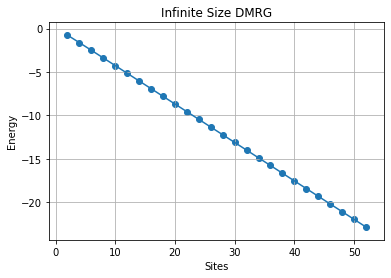

In [10]:
import matplotlib.pyplot as plt
plt.plot(Size,energy)
plt.scatter(Size,energy)
plt.xlabel("Sites")
plt.ylabel("Energy")
plt.title("Infinite Size DMRG")
plt.grid()
plt.show()

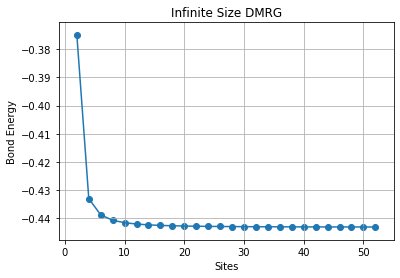

In [11]:
plt.plot(Size,BondEnergy)
plt.scatter(Size,BondEnergy)
plt.xlabel("Sites")
plt.ylabel("Bond Energy")
plt.title("Infinite Size DMRG")
plt.grid()
plt.show()

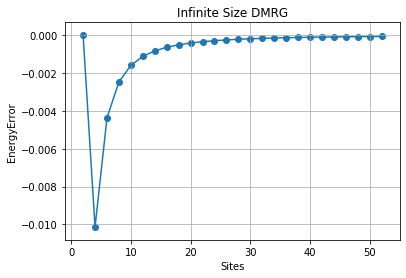

In [12]:
plt.plot(Size,EnergyError)
plt.scatter(Size,EnergyError)
plt.xlabel("Sites")
plt.ylabel("EnergyError")
plt.title("Infinite Size DMRG")
plt.grid()
plt.show()

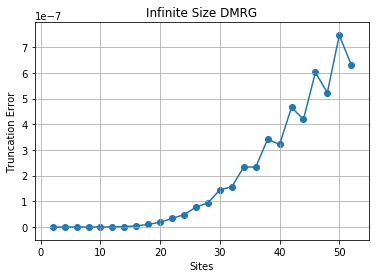

In [13]:
plt.plot(Size,Truncation)
plt.scatter(Size,Truncation)
plt.xlabel("Sites")
plt.ylabel("Truncation Error")
plt.title("Infinite Size DMRG")
plt.grid()
plt.show()